In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import data 
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Wine.csv')

In [3]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [6]:
df.shape

(178, 14)

In [7]:
df['Customer_Segment'].unique()

array([1, 2, 3], dtype=int64)

In [8]:
df['Customer_Segment'].value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

<AxesSubplot:xlabel='Customer_Segment', ylabel='count'>

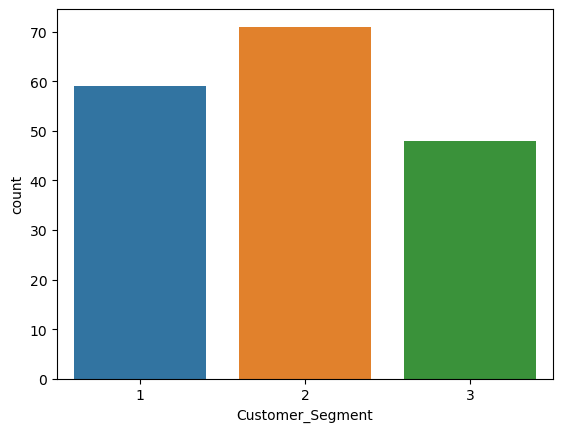

In [9]:
sns.countplot(x=df['Customer_Segment'])

In [10]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [11]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object

In [14]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [15]:
#splitting Data

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1)

In [17]:
#model building

In [18]:
lg = LogisticRegression()

In [19]:
lg.fit(xtrain,ytrain)

LogisticRegression()

In [20]:
ypred = lg.predict(xtest)

In [21]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [22]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        18
           2       0.89      1.00      0.94        17
           3       1.00      0.90      0.95        10

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



# PCA

In [23]:
sc = StandardScaler()

In [24]:
x = sc.fit_transform(x)

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA()
pca.fit_transform(x)

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [27]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [28]:
np.cumsum(pca.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

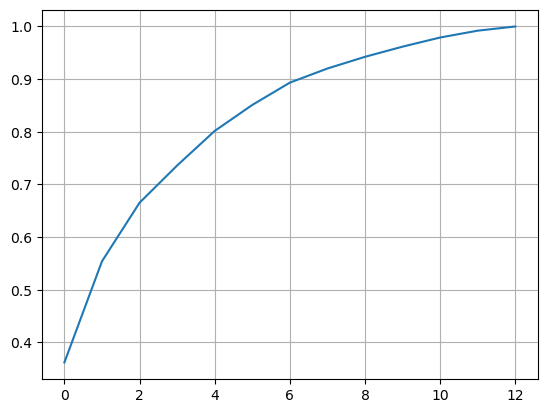

In [29]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()

In [30]:
pca = PCA(n_components=7)

In [31]:
pcs = pca.fit_transform(x)

In [32]:
pcs

array([[ 3.31675081, -1.44346263, -0.16573904, ...,  0.69304284,
        -0.22388013,  0.59642655],
       [ 2.20946492,  0.33339289, -2.02645737, ..., -0.25765463,
        -0.92712024,  0.05377561],
       [ 2.51674015, -1.0311513 ,  0.98281867, ..., -0.25103312,
         0.54927605,  0.42420545],
       ...,
       [-2.67783946, -2.76089913, -0.94094188, ...,  1.271355  ,
         0.27306792,  0.67923541],
       [-2.38701709, -2.29734668, -0.5506962 , ...,  0.81395522,
         1.17878298,  0.63397527],
       [-3.20875816, -2.76891957,  1.01391366, ..., -0.89519259,
         0.29609218,  0.00574126]])

In [33]:
data = pd.DataFrame(data=pcs,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

In [34]:
data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074
...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975


In [35]:
data['Class'] = y

In [36]:
data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Class
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,1
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,1
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,1
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,1
...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,3
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,3
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,3
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,3


In [37]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [38]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1)

In [39]:
lg = LogisticRegression()
lg.fit(xtrain,ytrain)

LogisticRegression()

In [40]:
ypred = lg.predict(xtest)

In [41]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       1.00      0.94      0.97        17
           3       1.00      1.00      1.00        10

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# THANK YOU!